# [Task 2] Relation Extraction  |  EDA

In [1]:
import re
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [2]:
%matplotlib inline
sns.set_style("dark")

## Util

In [3]:
def read_json(path):
    file = json.loads(open(path).read())
    
    return file

In [4]:
def extract_word(begin, end, txt):
    return txt[begin:end]

In [5]:
base_dir_json = "../../data/AGAC_training-annotations/AGAC_training/json/"
base_dir_tsv = "../../data/AGAC_training-annotations/AGAC_training/tsv/"

## EDA

Count of entities in the dataset.

In [6]:
obj_list = []

for f in os.listdir(base_dir_json):
    file = read_json(base_dir_json + f)
    obj = file['denotations'][0]['obj']
    obj_list.append(obj)

In [7]:
obj_df = pd.DataFrame(obj_list, columns=['obj'])

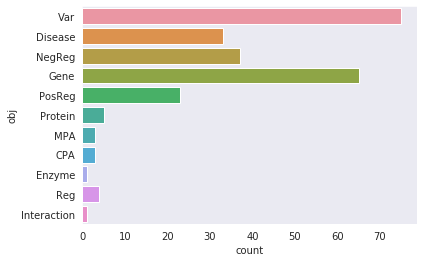

In [8]:
sns.countplot(y = "obj", data=obj_df)

Count of related words in the text.

In [9]:
word_list = []

for f in os.listdir(base_dir_json):
    file = read_json(base_dir_json + f)
    b = file['denotations'][0]['span']['begin']
    e = file['denotations'][0]['span']['end']
    txt = file['text']
    word = extract_word(b, e, txt)
    word_list.append(word)

In [10]:
word_df = pd.DataFrame(word_list, columns=['word'])

In [11]:
# sns.countplot(y = "word", data=word_df)

## Prepare data [1 Sample File]

Prepare data in the correct format for training. 

In [12]:
file = read_json("../../data/AGAC_sample-annotations/AGAC_sample/PubMed-28157721.json")

In [13]:
pprint(file)

{'denotations': [{'id': 'T1', 'obj': 'Var', 'span': {'begin': 144, 'end': 152}},
                 {'id': 'T28',
                  'obj': 'Gene',
                  'span': {'begin': 203, 'end': 208}},
                 {'id': 'T3',
                  'obj': 'PosReg',
                  'span': {'begin': 226, 'end': 242}},
                 {'id': 'T4',
                  'obj': 'NegReg',
                  'span': {'begin': 252, 'end': 268}},
                 {'id': 'T7', 'obj': 'Reg', 'span': {'begin': 292, 'end': 299}},
                 {'id': 'T6',
                  'obj': 'Disease',
                  'span': {'begin': 303, 'end': 318}},
                 {'id': 'T5',
                  'obj': 'Disease',
                  'span': {'begin': 323, 'end': 345}},
                 {'id': 'T8',
                  'obj': 'PosReg',
                  'span': {'begin': 448, 'end': 451}},
                 {'id': 'T9', 'obj': 'Var', 'span': {'begin': 452, 'end': 460}},
                 {'id': 'T10',
     

In [14]:
df = pd.read_csv("../../data/AGAC_training-annotations/AGAC_training/tsv/PubMed-28157721.tsv", sep="\t")
df.head()

,Id,Subject,Object,Predicate,Lexical cue
0,T1,144-152,Var,denotes,variants
1,T28,203-208,Gene,denotes,PCSK9
2,T3,226-242,PosReg,denotes,gain-of-function
3,T4,252-268,NegReg,denotes,loss-of-function
4,T7,292-299,Reg,denotes,effects


Label data in the BIO format. 

In [ ]:
#     print(obj_id, " : ", obj, " : ", word)
    
#     if len(word_split) == 2:
#         b_word = word_split[0]
#         i_word = word_split[-1]
#         b_obj = "B-" + obj
#         i_obj = "I-" + obj
#         word_label_dict[i_word] = i_obj
#         word_label_dict[b_word] = b_obj
    

#     else:
#         b_word = word_split[0]
#         b_obj = "B-" + obj
        
#         word_label_dict[b_word] = b_obj

In [17]:
pprint(file)

{'denotations': [{'id': 'T1', 'obj': 'Var', 'span': {'begin': 144, 'end': 152}},
                 {'id': 'T28',
                  'obj': 'Gene',
                  'span': {'begin': 203, 'end': 208}},
                 {'id': 'T3',
                  'obj': 'PosReg',
                  'span': {'begin': 226, 'end': 242}},
                 {'id': 'T4',
                  'obj': 'NegReg',
                  'span': {'begin': 252, 'end': 268}},
                 {'id': 'T7', 'obj': 'Reg', 'span': {'begin': 292, 'end': 299}},
                 {'id': 'T6',
                  'obj': 'Disease',
                  'span': {'begin': 303, 'end': 318}},
                 {'id': 'T5',
                  'obj': 'Disease',
                  'span': {'begin': 323, 'end': 345}},
                 {'id': 'T8',
                  'obj': 'PosReg',
                  'span': {'begin': 448, 'end': 451}},
                 {'id': 'T9', 'obj': 'Var', 'span': {'begin': 452, 'end': 460}},
                 {'id': 'T10',
     

In [42]:
df

,Id,Subject,Object,Predicate,Lexical cue
0,T1,144-152,Var,denotes,variants
1,T28,203-208,Gene,denotes,PCSK9
2,T3,226-242,PosReg,denotes,gain-of-function
3,T4,252-268,NegReg,denotes,loss-of-function
4,T7,292-299,Reg,denotes,effects
5,T6,303-318,Disease,denotes,LDL cholesterol
6,T5,323-345,Disease,denotes,cardiovascular disease
7,T8,448-451,PosReg,denotes,GOF
8,T9,452-460,Var,denotes,variants
9,T10,489-495,Reg,denotes,affect


In [25]:
df.tail(2)

,Id,Subject,Object,Predicate,Lexical cue
49,R8,T9,T8,CauseOf,"variants,GOF"
50,R9,T10,T12,CauseOf,"affect,reduce"


In [37]:
file['text'].split("\n")

['Complexity of mechanisms among human proprotein convertase subtilisin-kexin type 9 variants.',
 'PURPOSE OF REVIEW: There are many reports of human variants in proprotein convertase subtilisin-kexin type 9 (PCSK9) that are either gain-of-function (GOF) or loss-of-function (LOF), with downstream effects on LDL cholesterol and cardiovascular disease (CVD) risk. However, data on particular mechanisms have only been minimally curated.',
 'RECENT FINDINGS: GOF variants are individually ultrarare, affect all domains of the protein, act to reduce LDL receptor expression through several mechanisms, are a minor cause of familial hypercholesterolemia, have been reported mainly within families, have variable LDL cholesterol-raising effects, and are associated with increased CVD risk mainly through observational studies in families and small cohorts. In contrast, LOF variants can be either ultrarare mutations or relatively more common polymorphisms seen in populations, affect all domains of the 

In [26]:
doc_id = "".join(re.findall(r'\d', 'PubMed-28157721.json'))
txt = file['text']
id_obj_dict = {}


for i in range(len(file['denotations'])):
    b = file['denotations'][i]['span']['begin']
    e = file['denotations'][i]['span']['end']
    word = extract_word(b, e, txt)
    word_split = word.split(' ')
    obj = file['denotations'][i]['obj']
    obj_id = file['denotations'][i]['id']
    
    print(word, " - ", obj)
    
#     id_obj_dict[obj_id] = obj, word
    
# for i in range(len(file['relations'])):
#     obj = file['relations'][i]['obj']
#     subj = file['relations'][i]['subj']
#     pred = file['relations'][i]['pred']
#     print(id_obj_dict[obj], " "*10, pred, " " * 10, id_obj_dict[subj])
    
    
    

# id_obj_dict    


variants  -  Var
PCSK9  -  Gene
gain-of-function  -  PosReg
loss-of-function  -  NegReg
effects  -  Reg
LDL cholesterol  -  Disease
cardiovascular disease  -  Disease
GOF  -  PosReg
variants  -  Var
affect  -  Reg
domains of the protein  -  Protein
reduce  -  NegReg
LDL receptor  -  Protein
expression  -  MPA
cause  -  Reg
familial hypercholesterolemia  -  Disease
LOF  -  NegReg
variants  -  Var
affect  -  Reg
domains of the protein  -  Protein
increase  -  PosReg
LDL receptor  -  Protein
expression  -  MPA
LDL cholesterol  -  MPA
lowering  -  NegReg
decreased  -  NegReg
CVD  -  Disease


Create a list of tuples with doc_id, word, object.

In [ ]:
txt = re.sub(r'\n', " ", txt)
txt = re.sub(r'\.', "", txt)
txt = re.sub(r',', "", txt)
txt = re.sub(r':', "", txt)


txt_split = txt.split(" ")
final_list = []

for w in txt_split:
    if w in word_label_dict.keys():
        final_list.append((doc_id, w, word_label_dict[w]))
    else:
        final_list.append((doc_id, w, "O"))

In [ ]:
word_label_dict

In [ ]:
data_df = pd.DataFrame(final_list, columns=['doc_id', 'obj', 'word'])

In [ ]:
data_df.head()

In [ ]:
data_df[data_df['word'] != 'O'].head()

## Prepare Data [All Sample Files]

In [ ]:
word_label_dict = {}

    
for f in os.listdir(base_dir):
    file = read_json(base_dir + f)
    doc_id = "".join(re.findall(r'\d', f))
    txt = file['text']


    for i in range(len(file['denotations'])):
        b = file['denotations'][i]['span']['begin']
        e = file['denotations'][i]['span']['end']
        word = extract_word(b, e, txt)
        word_split = word.split(' ')
        obj = file['denotations'][i]['obj']

        if len(word_split) == 2:
            b_word = word_split[0]
            i_word = word_split[-1]
            b_obj = "B-" + obj
            i_obj = "I-" + obj
            word_label_dict[i_word] = i_obj
            word_label_dict[b_word] = b_obj


        else:
            b_word = word_split[0]
            b_obj = "B-" + obj

            word_label_dict[b_word] = b_obj

In [ ]:
final_list = []

for f in os.listdir(base_dir):
    file = read_json(base_dir + f)
    doc_id = "".join(re.findall(r'\d', f))
    txt = file['text']

    txt = re.sub(r'\n', " ", txt)
    txt = re.sub(r'\.', "", txt)
    txt = re.sub(r',', "", txt)
    txt = re.sub(r':', "", txt)


    txt_split = txt.split(" ")

    for w in txt_split:
        if w in word_label_dict.keys():
            final_list.append((doc_id, w, word_label_dict[w]))
        else:
            final_list.append((doc_id, w, "O"))

In [ ]:
data_df = pd.DataFrame(final_list, columns=['doc_id', 'word', 'obj'])

In [ ]:
data_df.head()

In [ ]:
data_df.groupby('doc_id').count().plot(kind = "bar")